## Importing libraries

In [2]:
%pip install powerlaw

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw
from scipy.stats import lognorm

Note: you may need to restart the kernel to use updated packages.


## Loading the dataset

In [4]:
df = pd.read_csv('All Domains .csv')
df.head(10)

,Tech Domain,Total
0,ELECTRICAL ENGINEERING,449278
1,CHEMISTRY,442543
2,MECHANICAL ENGINEERING,304769
3,INSTRUMENTS,227990
4,OTHER FIELDS,84655


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tech Domain  5 non-null      object
 1   Total        5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


## Display

### Emperical distribution

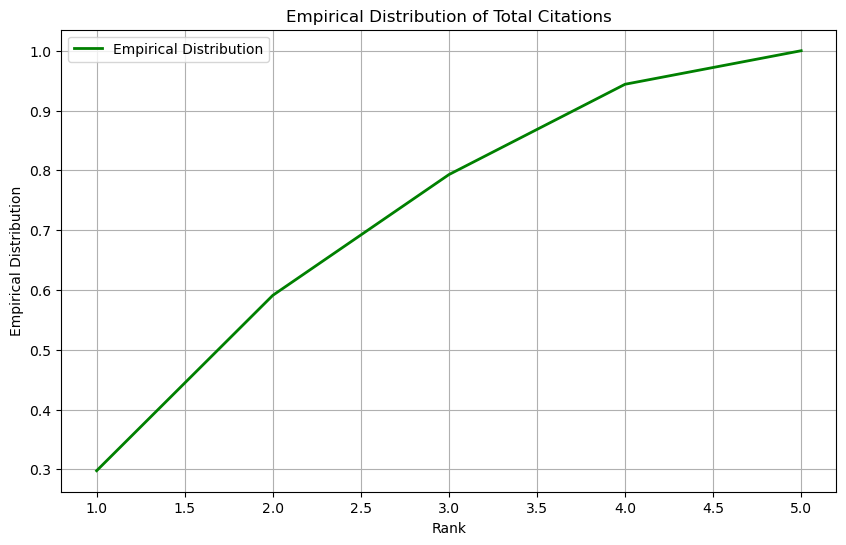

In [6]:
# Extract and sort citation counts in descending order
total_citations = df['Total']
total_citations_sorted = total_citations.sort_values(ascending=False)

# Calculate ranks and empirical distribution
ranks = np.arange(1, len(total_citations_sorted) + 1)
empirical_distribution = total_citations_sorted.cumsum() / total_citations_sorted.sum()

# Combine ranks and empirical distribution into a DataFrame
empirical_data = pd.DataFrame({'Rank': ranks, 'Empirical Distribution': empirical_distribution})

# Step 5: Plot the empirical distribution
plt.figure(figsize=(10, 6))
plt.plot(empirical_data['Rank'], empirical_data['Empirical Distribution'], 'g-', lw=2, label='Empirical Distribution')
plt.xlabel('Rank')
plt.ylabel('Empirical Distribution')
plt.title('Empirical Distribution of Total Citations')
plt.legend()
plt.grid(True)
plt.show()


### Lognormal fit

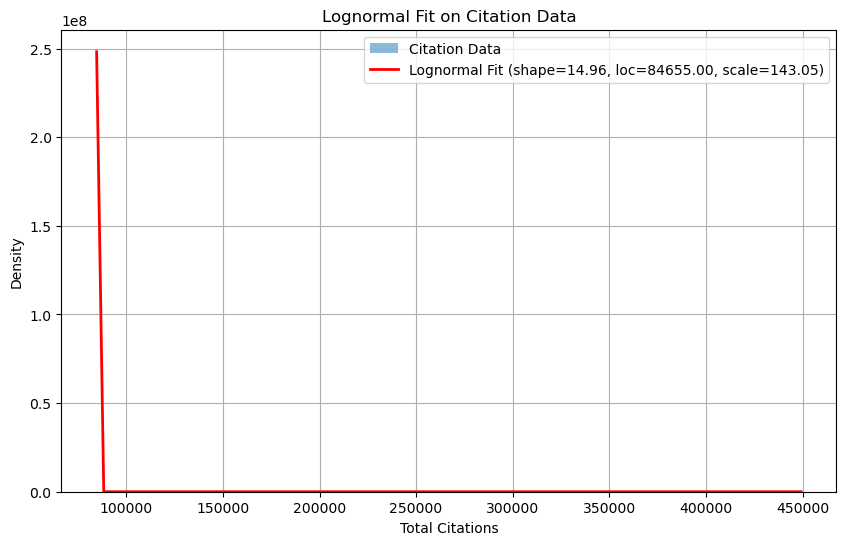

In [7]:
# Extract the 'Total' column (citation counts)
total_citations = df['Total']

# Fit a lognormal distribution to the citation data
shape, loc, scale = lognorm.fit(total_citations)

# Generate x values for plotting
x = np.linspace(min(total_citations), max(total_citations), 100)

# Calculate the PDF of the fitted lognormal distribution
pdf = lognorm.pdf(x, shape, loc, scale)

# Plot the histogram and lognormal fit
plt.figure(figsize=(10, 6))
plt.hist(total_citations, bins=30, density=True, alpha=0.5, label='Citation Data')
plt.plot(x, pdf, 'r-', lw=2, label=f'Lognormal Fit (shape={shape:.2f}, loc={loc:.2f}, scale={scale:.2f})')

# Add labels and title
plt.xlabel('Total Citations')
plt.ylabel('Density')
plt.title('Lognormal Fit on Citation Data')
plt.legend()
plt.grid(True)
plt.show()


### Power law fit

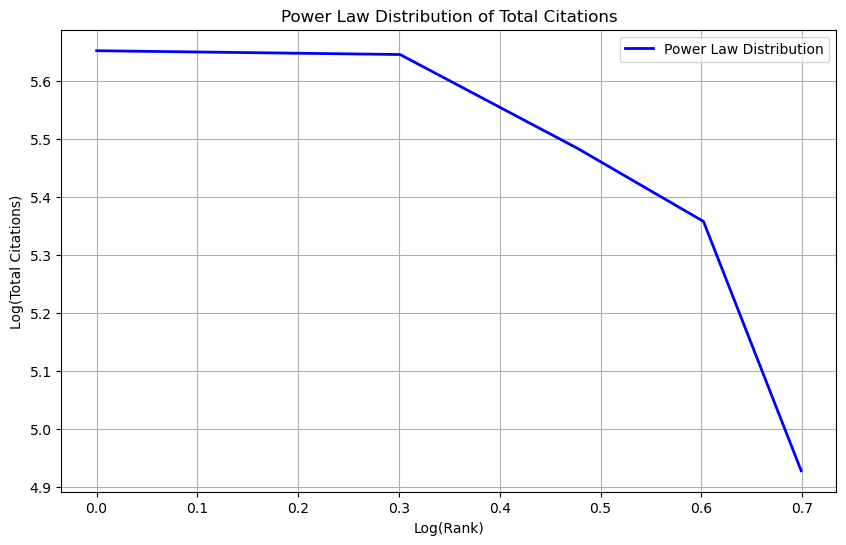

In [9]:

# Extract citation counts
total_citations = df['Total']

# Sort citation counts in descending order
total_citations_sorted = np.sort(total_citations)[::-1]

# Calculate ranks for each citation count
ranks = np.arange(1, len(total_citations_sorted) + 1)

# Log-transform the ranks and citation counts
log_ranks = np.log10(ranks)
log_citations = np.log10(total_citations_sorted)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(log_ranks, log_citations, 'b-', lw=2, label='Power Law Distribution')
plt.xlabel('Log(Rank)')
plt.ylabel('Log(Total Citations)')
plt.title('Power Law Distribution of Total Citations')
plt.legend()
plt.grid(True)
plt.show()


### Pareto distribution

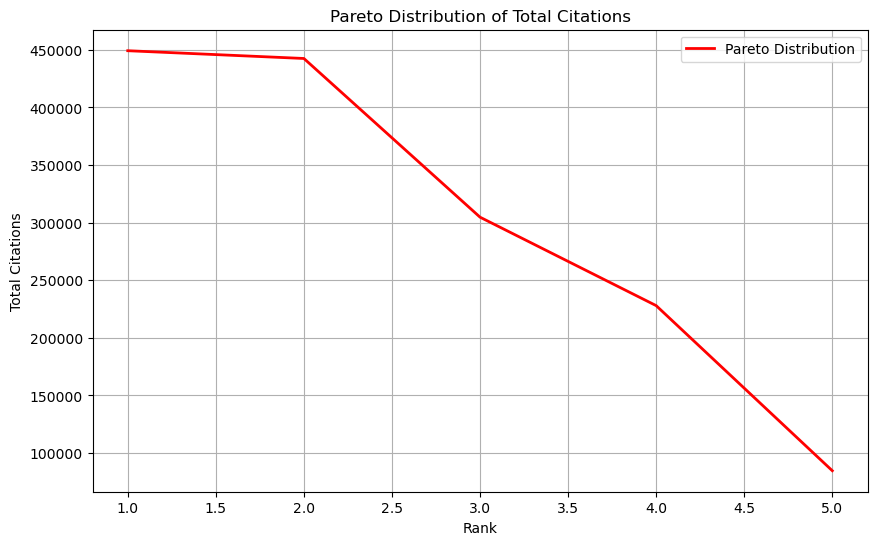

In [10]:
# Extract citation counts
total_citations = df['Total']

# Sort citations in descending order
total_citations_sorted = np.sort(total_citations)[::-1]


# Create Pareto plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(total_citations_sorted) + 1), total_citations_sorted, 'r-', lw=2, label='Pareto Distribution')
plt.xlabel('Rank')
plt.ylabel('Total Citations')
plt.title('Pareto Distribution of Total Citations')
plt.legend()
plt.grid(True)
plt.show()